## ConcatenateView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@3baf5137

This `Op` wraps the `Views.concatenate()` method of ImgLib2, taking a `List` of n-dimensional `RandomAccessibleInterval`s with the same size in every dimension except one and **laying them side by side in the one dimension with different sizes** to form a single n-dimensional `RandomAccessibleInterval`. Let's see how this `Op` is called:

In [2]:
ij.op().help('concatenateView')

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.transform.concatenateView.ConcatenateViewWithAccessMode(
		List in,
		int concatenationAxis,
		StackAccessMode stackAccessMode)
	(RandomAccessibleInterval out) =
	net.imagej.ops.transform.concatenateView.DefaultConcatenateView(
		List in,
		int concatenationAxis)

We will look at the latter of the two, for this notebook. Let's start by creating a few two-dimensional images with the same height but different widths:

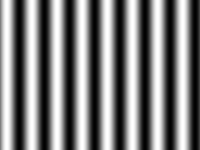

In [3]:
import net.imglib2.FinalInterval
import net.imglib2.img.Img
import net.imglib2.type.numeric.integer.UnsignedByteType

dims1 = new FinalInterval(200, 150)

imgList = new ArrayList<Img>()

input1 = ij.op().create().img(dims1, new UnsignedByteType())
equation1 = "127 * Math.sin(p[0] / 4) + 128"
ij.op().run("equation", input1, equation1)

imgList.add(input1)

ij.notebook().display(input1)

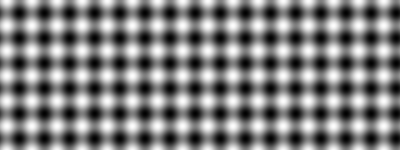

In [4]:
import net.imglib2.FinalInterval
import net.imglib2.img.Img
import net.imglib2.type.numeric.integer.UnsignedByteType

dims2 = new FinalInterval(400, 150)

input2 = ij.op().create().img(dims2, new UnsignedByteType())
equation2 = "63 *( Math.sin(p[0] / 4) + Math.cos(p[1] / 4) ) + 127"
ij.op().run("equation", input2, equation2)

imgList.add(input2)

ij.notebook().display(input2)

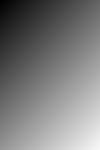

In [5]:
import net.imglib2.FinalInterval
import net.imglib2.img.Img
import net.imglib2.type.numeric.integer.UnsignedByteType

dims3 = new FinalInterval(100, 150)

input3 = ij.op().create().img(dims3, new UnsignedByteType())
equation3 = "p[0] + p[1]"
ij.op().run("equation", input3, equation3)

imgList.add(input3)

ij.notebook().display(input3)

We can concatenate the images by passing `imgList` through to `concatenate()`. The `concatenationAxis` is the first axis (`concatenationAxis = 0`), since we want to lay them down side by side, not on top of each other (in this case, we would want `concatenationAxis = 1)`:

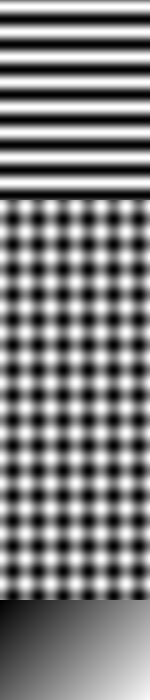

In [6]:
concatenationAxis = 0

concatenated = ij.op().run("concatenateView", imgList, concatenationAxis)

ij.notebook().display(concatenated)